# Introduction to Regression with Neural Networks in TensorFlow

In [ ]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.13.0


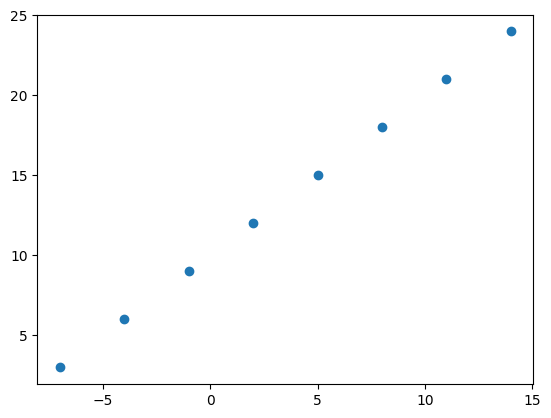

In [ ]:
# Creating data to view and fit it
import numpy as np
import matplotlib.pyplot as plt

# Create features
X=np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])

# Create labels
y=np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])

#Visualise it
plt.scatter(X,y)

# Input and Output shapes

In [ ]:
# Crete a demo tensor for our housing price prediction problem
house_info=tf.constant(["bedroom","bathroom","garage"])
house_price=tf.constant([939700])
house_info,house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
input_shape=X.shape
output_shape=y.shape
input_shape,output_shape

((8,), (8,))

In [ ]:
# Turn numpy arrays into tensors
X=tf.constant(X)
y=tf.constant(y)
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

## Steps in modelling with TensorFlow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compile a model** - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation matrix (what we can use to interpret the performance of our model).
3. Fitting a model - letting the model try to find patterns between X and y(features and labels)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # Stochastic Gradient Descent)
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X,axis=-1),y,epochs=5)


Epoch 1/5
1/1 [==============================] - 0s 462ms/step - loss: 22.0181 - mae: 22.0181
Epoch 2/5
1/1 [==============================] - 0s 13ms/step - loss: 21.6250 - mae: 21.6250
Epoch 3/5
1/1 [==============================] - 0s 13ms/step - loss: 21.2318 - mae: 21.2318
Epoch 4/5
1/1 [==============================] - 0s 11ms/step - loss: 20.8387 - mae: 20.8387
Epoch 5/5
1/1 [==============================] - 0s 11ms/step - loss: 20.4677 - mae: 20.4677


In [ ]:
# Check out X and y
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# Try and make a prediction
model.predict([17])

1/1 [==============================] - 0s 110ms/step


array([[-24.119204]], dtype=float32)

# Improving our model

We can improve the moodel, by altering the steps we took to create a model.

1. **Creating a model** - Here we might add more layers, increase the number of hidden units (also called neurons) within each of the hidden layers, change the activation function of each layer.
2. **Compiling a a model** - Here we might change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting a model** - Here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).

In [ ]:
# Lets rebuild our model
# 1. Create the model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X,axis=-1),y,epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 409ms/step - loss: 9.8645 - mae: 9.8645
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 9.7320 - mae: 9.7320
Epoch 3/100
1/1 [==============================] - 0s 13ms/step - loss: 9.5995 - mae: 9.5995
Epoch 4/100
1/1 [==============================] - 0s 13ms/step - loss: 9.4670 - mae: 9.4670
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 9.3345 - mae: 9.3345
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 9.2020 - mae: 9.2020
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 9.0695 - mae: 9.0695
Epoch 8/100
1/1 [==============================] - 0s 13ms/step - loss: 8.9370 - mae: 8.9370
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 8.8045 - mae: 8.8045
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 8.6720 - mae: 8.6720
Epoch 11/100
1/1 [==============================] - 0s 11ms/step - l

In [ ]:
# Remind ourselves of the data
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# Let's see if our model's prediction has improved
model.predict([17])

1/1 [==============================] - 0s 132ms/step


array([[29.760424]], dtype=float32)

In [ ]:
# Let's see if we can make another to imrove our model

# 1. Create the model (this time with extra hidden layers)
model=tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2.Compile the model
model.compile(loss=tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X,axis=-1),y,epochs=100)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 13.3888 - mae: 13.3888
Epoch 2/100
1/1 [==============================] - 0s 26ms/step - loss: 12.8637 - mae: 12.8637
Epoch 3/100
1/1 [==============================] - 0s 24ms/step - loss: 12.3470 - mae: 12.3470
Epoch 4/100
1/1 [==============================] - 0s 26ms/step - loss: 11.8188 - mae: 11.8188
Epoch 5/100
1/1 [==============================] - 0s 14ms/step - loss: 11.2843 - mae: 11.2843
Epoch 6/100
1/1 [==============================] - 0s 24ms/step - loss: 10.7373 - mae: 10.7373
Epoch 7/100
1/1 [==============================] - 0s 17ms/step - loss: 10.1651 - mae: 10.1651
Epoch 8/100
1/1 [==============================] - 0s 23ms/step - loss: 9.5629 - mae: 9.5629
Epoch 9/100
1/1 [==============================] - 0s 18ms/step - loss: 8.9254 - mae: 8.9254
Epoch 10/100
1/1 [==============================] - 0s 18ms/step - loss: 8.2484 - mae: 8.2484
Epoch 11/100
1/1 [==============================] - 0s 22

In [ ]:
# Let's see if our model's prediction has improved
model.predict([17])

1/1 [==============================] - 0s 268ms/step


array([[31.677595]], dtype=float32)

Overfitting the data

In [ ]:
# Let's see if we can make another to imrove our model

# 1. Create the model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(50,activation=None),
    tf.keras.layers.Dense(1)
])

# 2.Compile the model
model.compile(loss=tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X,axis=-1),y,epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 13.5475 - mae: 13.5475
Epoch 2/100
1/1 [==============================] - 0s 21ms/step - loss: 13.4763 - mae: 13.4763
Epoch 3/100
1/1 [==============================] - 0s 20ms/step - loss: 13.4051 - mae: 13.4051
Epoch 4/100
1/1 [==============================] - 0s 29ms/step - loss: 13.3339 - mae: 13.3339
Epoch 5/100
1/1 [==============================] - 0s 21ms/step - loss: 13.2627 - mae: 13.2627
Epoch 6/100
1/1 [==============================] - 0s 19ms/step - loss: 13.1914 - mae: 13.1914
Epoch 7/100
1/1 [==============================] - 0s 17ms/step - loss: 13.1201 - mae: 13.1201
Epoch 8/100
1/1 [==============================] - 0s 30ms/step - loss: 13.0488 - mae: 13.0488
Epoch 9/100
1/1 [==============================] - 0s 12ms/step - loss: 12.9775 - mae: 12.9775
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 12.9062 - mae: 12.9062
Epoch 11/100
1/1 [==============================] -

In [ ]:
# Let's see if our model's prediction has improved
model.predict([17])

1/1 [==============================] - 0s 171ms/step


array([[32.13213]], dtype=float32)

## Evaluating a model

In practice, a typical workflow you'll go through when building neural network is:

```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it  -> tweak a model -> fit it -> evaluate it...
```

Evaluation involves visualisation

It's a good idea to visualize:
* The data - what data are we working with? What does it look like?
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predicition of the model - how do the predicctions of a model line up  truth (original label)?

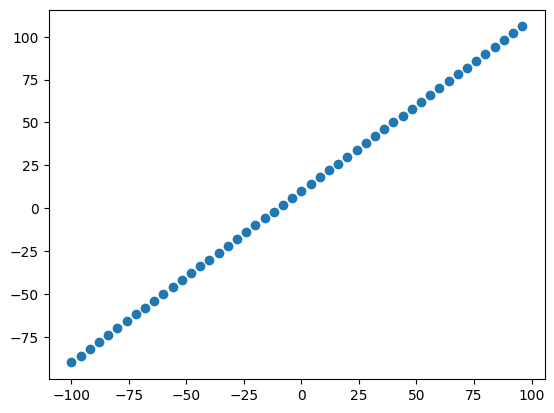

In [ ]:
# Make a bigger dataset
X=tf.range(-100,100,4)
y=X+10

#Visualize the data
plt.scatter(X,y);


### The 3 sets...

* Training set - the model learns from this data, which is typically 70-80% of the total data you have available.
* Validation set - the model gets tuned on this data, which is typically 10-15% of the data available.
* Test set - the model gets evaluated on this data to test what it has learned, this set is typically 10-15% of the total data available.


In [ ]:
# Check the length of how many samples we have
len(X)

50

In [ ]:
# Split the data ino train and test sets
X_train=X[:40]  # first 40 are training samples (80% of the data)
y_train=y[:40]

X_test=X[40:]   # last 10 are testing samples (20% of the data)
y_test=y[40:]

### Visualising the data
Now we've got our data in training and test sets...let's visualize it again



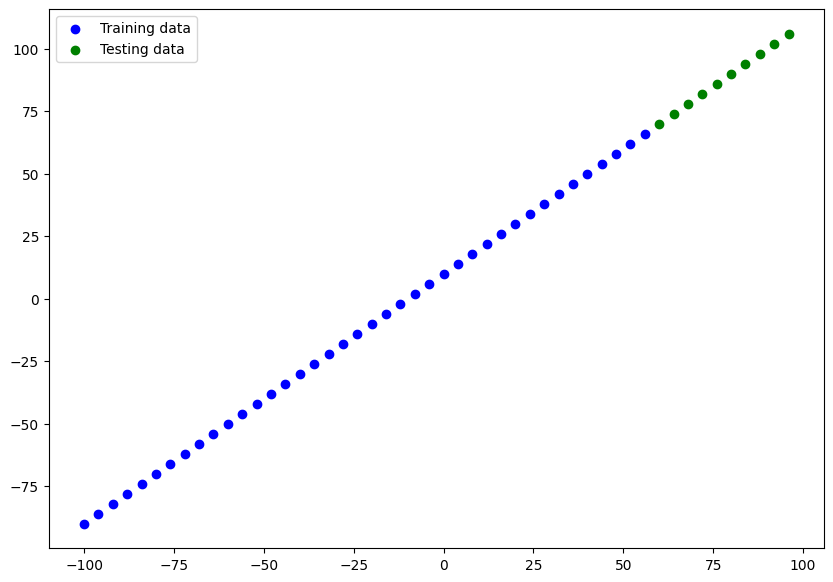

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(X_train,y_train,c="b",label="Training data")
plt.scatter(X_test,y_test,c="g",label="Testing data")
plt.legend();

In [ ]:
 # Let's have a look at how to build a neural network for our data

 # 1. Create a model
 model=tf.keras.Sequential([
    tf.keras.layers.Dense(10,input_shape=[1],name="input_layer"),
    tf.keras.layers.Dense(1,name="output_layer")
 ], name="model_1")

 # 2. Compile the model
 model.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["mae"])

 # 3. Fit the model
 model.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=100,verbose=0)

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Visualizing the model

* Total params - total number of parameters in the model
* Trainable parameters - these are the parameters (patterns) the model can update as it trains
* Non-trainable params - these parameters aren't updated during training (this is typical when you bring in already learn patterns or parameters from other models during **transfer learning**)

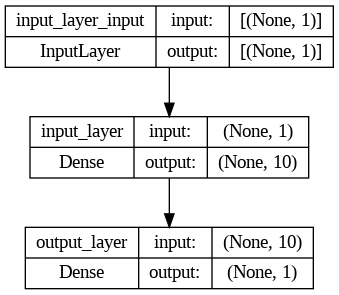

In [ ]:
from  tensorflow.keras.utils import plot_model
plot_model(model=model,show_shapes=True)

### Visualizing our model's predictions

To visualize predicitions, it's a good idea to plot them against the ground truth labels.



In [ ]:
# 1. Create a model
model=tf.keras.Sequential([
        tf.keras.layers.Dense(10),
        tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=200)

Epoch 1/200
2/2 [==============================] - 1s 29ms/step - loss: 32.7006 - mae: 32.7006
Epoch 2/200
2/2 [==============================] - 0s 14ms/step - loss: 20.2603 - mae: 20.2603
Epoch 3/200
2/2 [==============================] - 0s 15ms/step - loss: 26.9008 - mae: 26.9008
Epoch 4/200
2/2 [==============================] - 0s 18ms/step - loss: 12.8696 - mae: 12.8696
Epoch 5/200
2/2 [==============================] - 0s 13ms/step - loss: 15.8654 - mae: 15.8654
Epoch 6/200
2/2 [==============================] - 0s 9ms/step - loss: 12.5629 - mae: 12.5629
Epoch 7/200
2/2 [==============================] - 0s 13ms/step - loss: 11.8135 - mae: 11.8135
Epoch 8/200
2/2 [==============================] - 0s 11ms/step - loss: 10.8131 - mae: 10.8131
Epoch 9/200
2/2 [==============================] - 0s 11ms/step - loss: 36.9488 - mae: 36.9488
Epoch 10/200
2/2 [==============================] - 0s 17ms/step - loss: 24.7021 - mae: 24.7021
Epoch 11/200
2/2 [==============================] 

In [ ]:
# Make some predictions
y_preds=model.predict(X_test)
y_preds

1/1 [==============================] - 0s 278ms/step


array([[58.40115 ],
       [62.09393 ],
       [65.78672 ],
       [69.4795  ],
       [73.17229 ],
       [76.865074],
       [80.55785 ],
       [84.25064 ],
       [87.943436],
       [91.63621 ]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
# Let's create a plotting function
def plot_predicitions(train_data=X_train,
                      train_labels=y_train,
                      test_data=X_test,
                      test_labels=y_test,
                      predictions=y_preds):
  """
  Plots training data, test data and compares predictions to ground truth labels
  """
  plt.figure(figsize=(10,7))
  # Plot training data in blue
  plt.scatter(train_data,train_labels,c="b",label="Training data")
  # Plot testing data in green
  plt.scatter(test_data,test_labels,c="g",label="Testing data")
  # Plot model's predicitions in red
  plt.scatter(test_data,predictions,c="r",label="Predictions")
  # Show the legend
  plt.legend()


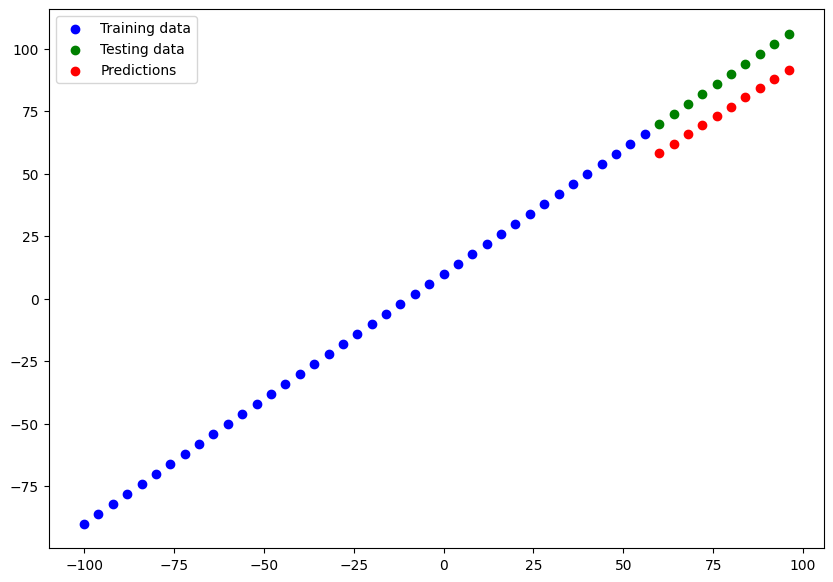

In [ ]:
plot_predicitions()

### Evaluating our model's prediction with regression evaluations metrics

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.

Since we're working on a regression, two of the main metrics:
* MAE - mean absolute error, "on average, how wrong is each of my model's predictions"
* MSE - mean square error, "square the average erros"

In [ ]:
# Evaluate the model on the test
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 269ms/step - loss: 12.9813 - mae: 12.9813


[12.981321334838867, 12.981321334838867]

In [ ]:
# Calculate the mean absolute error
tf.metrics.mean_absolute_error(y_test,y_preds)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([29.59885  , 25.90607  , 22.21328  , 18.5205   , 15.462171 ,
       13.0809555, 11.376859 , 10.349872 , 10.       , 10.327242 ],
      dtype=float32)>

In [ ]:
tf.constant(y_preds)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[58.40115 ],
       [62.09393 ],
       [65.78672 ],
       [69.4795  ],
       [73.17229 ],
       [76.865074],
       [80.55785 ],
       [84.25064 ],
       [87.943436],
       [91.63621 ]], dtype=float32)>

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
tf.squeeze(y_preds)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([58.40115 , 62.09393 , 65.78672 , 69.4795  , 73.17229 , 76.865074,
       80.55785 , 84.25064 , 87.943436, 91.63621 ], dtype=float32)>

In [ ]:
# Calculate the mean absolute error
mae=tf.metrics.mean_absolute_error(y_test,tf.squeeze(y_preds))

In the previous metrics calculation, y_preds and y_test were not in the same size

In [ ]:
# Calculate the mean squared the error
mse=tf.metrics.mean_squared_error(y_test,tf.squeeze(y_preds))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=169.29332>

In [ ]:
# Make some functions to reuse MAE & MSE
def mae(y_true,y_preds):
  return tf.metrics.mean_absolute_error(y_true,tf.squeeze(y_preds))

def mse(y_true,y_preds):
  return tf.metrics.mean_squared_error(y_true,tf.squeeze(y_preds))

### Running experiments to improve our model

```
Build a model -> fit it -> evaluate it -> tweak it -> fit it-> evaluate it -> tweak it -> fit it -> evaluate it
```

1. Get more data - get more examples for ypur model to train on (more opportunities to learn patterns or relationships between features and labels).
2. Make your model larger (using a more complex model) - this might come in the form of more layers or more hidden units in each layer.
3. Train for longer - give your model more of a chance to find patterns in the data

Let's do 3 modelling experiments:
1. `model_1` - same as the original model, 1 layer, trained for 100 epochs
2. `model_2` - 2 layers, trained for 100 epochs
3. `model_3` - 2 layers, trained for 500 epochs

**Build `model_1`**

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_1=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_1.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 27ms/step - loss: 13.2731 - mae: 13.2731
Epoch 2/100
2/2 [==============================] - 0s 10ms/step - loss: 9.8832 - mae: 9.8832
Epoch 3/100
2/2 [==============================] - 0s 21ms/step - loss: 11.3277 - mae: 11.3277
Epoch 4/100
2/2 [==============================] - 0s 13ms/step - loss: 9.5354 - mae: 9.5354
Epoch 5/100
2/2 [==============================] - 0s 12ms/step - loss: 10.4404 - mae: 10.4404
Epoch 6/100
2/2 [==============================] - 0s 13ms/step - loss: 9.6700 - mae: 9.6700
Epoch 7/100
2/2 [==============================] - 0s 18ms/step - loss: 8.7704 - mae: 8.7704
Epoch 8/100
2/2 [==============================] - 0s 12ms/step - loss: 9.0593 - mae: 9.0593
Epoch 9/100
2/2 [==============================] - 0s 10ms/step - loss: 19.2560 - mae: 19.2560
Epoch 10/100
2/2 [==============================] - 0s 9ms/step - loss: 10.3935 - mae: 10.3935
Epoch 11/100
2/2 [==============================] - 0s 10ms/

1/1 [==============================] - 0s 105ms/step


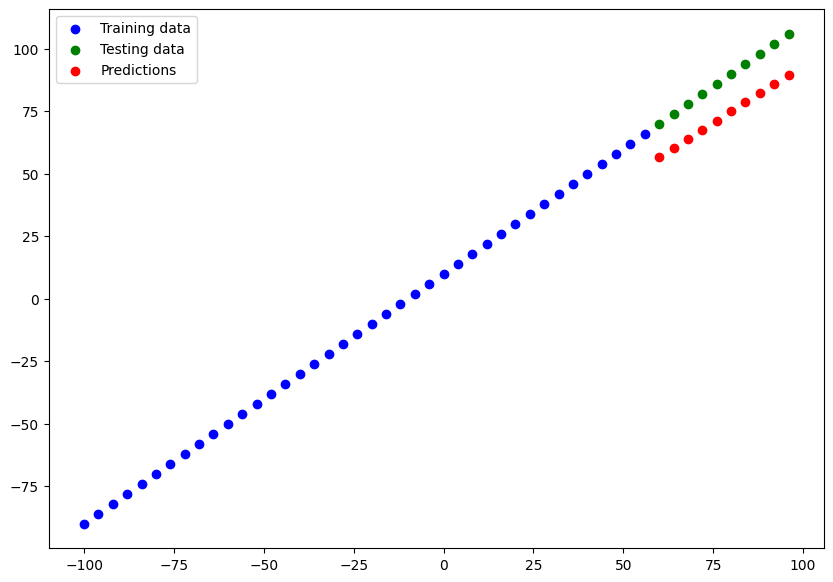

In [ ]:
# Make and plot predictions for model_1
y_preds_1=model_1.predict(X_test)
plot_predicitions(predictions=y_preds_1)

In [ ]:
# Calculate model_1 evaluation metrics
mae_1=mae(y_test,tf.squeeze(y_preds_1))
mse_1=mse(y_test,tf.squeeze(y_preds_1))
mae_1,mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=14.909155>,
 <tf.Tensor: shape=(), dtype=float32, numpy=223.1206>)

**Build `model_2`**
* 2 dense layers, trained for 100 epochs

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Replicate model_1 and add an extra layer
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1) # add a second layer
])

# Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0) # set verbose to 0 for less output


1/1 [==============================] - 0s 193ms/step


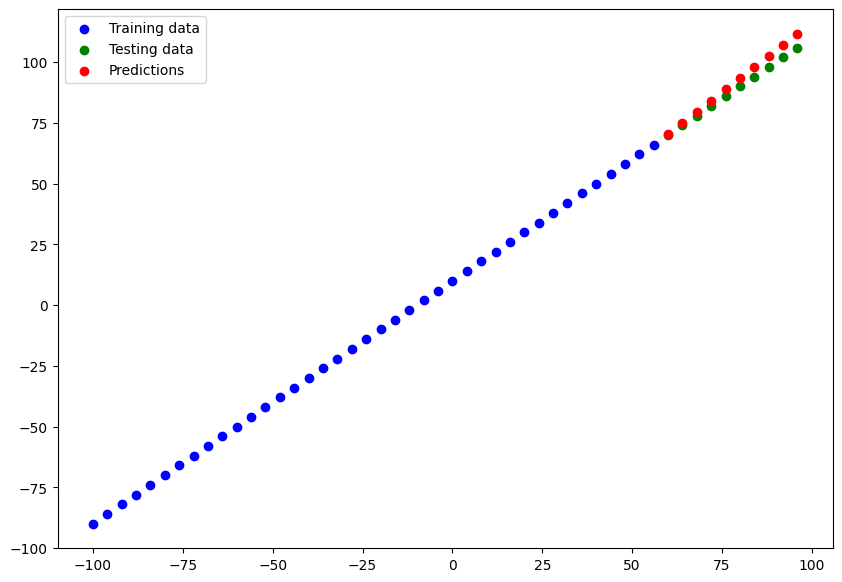

In [ ]:
# Make and plot predictions for model_1
y_preds_2=model_2.predict(X_test)
plot_predicitions(predictions=y_preds_2)

In [ ]:
# Calculate model_2 metrics
mae_2 = mae(y_test, y_preds_2.squeeze()).numpy()
mse_2 = mse(y_test, y_preds_2.squeeze()).numpy()
mae_2, mse_2

(3.0716262, 12.2277775)

**Build `model_3`**
* For our 3rd model, we'll keep everything the same as model_2 except this time we'll train for longer (500 epochs instead of 100).

This will give our model more of a chance to learn the patterns in the data.

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Replicate model_2
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model (this time for 500 epochs, not 100)
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500, verbose=0) # set verb

1/1 [==============================] - 0s 62ms/step


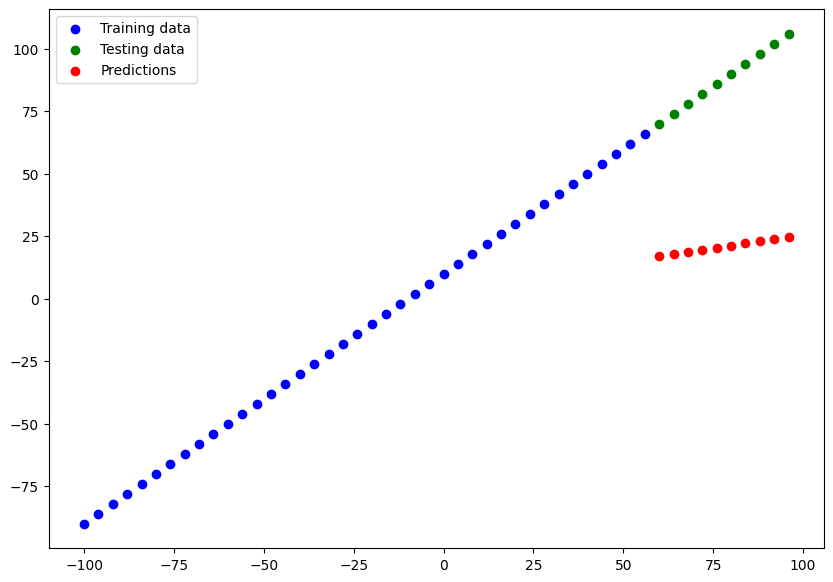

In [ ]:
# Make and plot predictions for model_3
y_preds_3 = model_3.predict(X_test)
plot_predicitions(predictions=y_preds_3)

Strange, we trained for longer but our model performed worse?

As it turns out, our model might've trained too long and has thus resulted in worse results (we'll see ways to prevent training for too long later on).

In [ ]:
# Calculate model_3 metrics
mae_3 = mae(y_test, y_preds_3.squeeze()).numpy()
mse_3 = mse(y_test, y_preds_3.squeeze()).numpy()
mae_3, mse_3


(67.11461, 4586.8916)

🔑**Note:** You want to start with small experiments (small models) and amke sure they work and then increase their scale when necessary

### Comparing the results of our experiments
We've run a few experiments, let's compare the results.

In [ ]:
import pandas as pd
model_results=[["model_1",mae_1.numpy(),mse_1.numpy()],
               ["model_2",mae_2,mse_2],
               ["model_3",mae_3,mse_3]]
all_results=pd.DataFrame(model_results,columns=["model","MAE","MSE"])
all_results

,model,MAE,MSE
0,model_1,14.909155,223.120605
1,model_2,3.071626,12.227777
2,model_3,67.114609,4586.891602


Looks lime `model_2` performed the best...

In [ ]:
model_2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 1)                 2         
                                                                 
 dense_10 (Dense)            (None, 1)                 2         
                                                                 
Total params: 4 (16.00 Byte)
Trainable params: 4 (16.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


🔑 Note: One of your main goals should be to minimize the time between your experiments. The more experiments you do, the more things you'll figure out which don't work and in turn, get closer to figuring out what does work. Remember the machine learning practitioner's motto: "experiment, experiment, experiment".

###Tracking your experiments

One really good habit to get into is tracking your modelling experiments to see which perform better than others.

And when doing so, it can be tedious if you're running lots of experiments.

Luckily, there are tools to help us!

**Resource:** As you build more models, you'll want to look into using:

* TensorBoard - a component of the TensorFlow library to help track modelling experiments (we'll see this later).
* Weights & Biases - a tool for tracking all kinds of machine learning experiments (the good news for Weights & Biases is it plugs into TensorBoard).


### Saving our models

Saving our models allows us to use them outside of Google Colab (or wherever they were trained) such as in a web application or a mobile app

There are two main formats we can save our model's :
1. The SavedModel format
2. The HDF5 format

In [ ]:
# Save model using the SavedModel format
model_2.save("best_model_SavedModel_format")

In [ ]:
# Save model using the HDF5 format
model.save("best_model_HDF5_format.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Loading in a saved model

In [ ]:
loaded_SavedModel_format=tf.keras.models.load_model("/content/best_model_SavedModel_format")

In [ ]:
loaded_SavedModel_format.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 1)                 2         
                                                                 
 dense_10 (Dense)            (None, 1)                 2         
                                                                 
Total params: 4 (16.00 Byte)
Trainable params: 4 (16.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 1)                 2         
                                                                 
 dense_10 (Dense)            (None, 1)                 2         
                                                                 
Total params: 4 (16.00 Byte)
Trainable params: 4 (16.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compare model_2 predictions with SavedModel format model predictions
model_2.predict(X_test)==loaded_SavedModel_format.predict(X_test)

1/1 [==============================] - 0s 59ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
# Load in a model using the .h5 format
loaded_h5_model=tf.keras.models.load_model("/content/best_model_HDF5_format.h5")

In [ ]:
# Compare model predictions with .h5 format model predictions
model.predict(X_test)==loaded_h5_model.predict(X_test)

1/1 [==============================] - 0s 59ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## Download a model (or any other file) from Google Colab
* Right click on the file in the files pane and click 'download'.
* Use the code below.
* Save it to Googel Drive by connecting Google Drive and copying it there

In [ ]:
# Download the model (or any file) from Google Colab
from google.colab import files
files.download("best_model_HDF5_format.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### A larger example

In [ ]:
# Important Required Libraries
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
# Let's try one-hot encode our DataFrame so it's all numbers
insurance_one_hot=pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
# Create X & y values (features and labels)
X=insurance_one_hot.drop("charges",axis=1)
y=insurance_one_hot["charges"]

In [ ]:
# View X
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [ ]:
# View y
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [ ]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [ ]:
# Build a neural network
tf.random.set_seed(42)

# 1. Create a model
insurance_model=tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])

# 3. Fit the model
insurance_model.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 13277.7900 - mae: 13277.7900
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 12384.8770 - mae: 12384.8770
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 12179.9072 - mae: 12179.9072
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 12107.4336 - mae: 12107.4336
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 11998.2656 - mae: 11998.2656
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 11821.8750 - mae: 11821.8750
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 11514.2510 - mae: 11514.2510
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 11020.5918 - mae: 11020.5918
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 10408.3652 - mae: 10408.3652
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 9763.830

In [ ]:
# Check the results of insurance model on the test data
insurance_model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 3ms/step - loss: 8930.0596 - mae: 8930.0596


[8930.0595703125, 8930.0595703125]

In [ ]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)


Right now it looks like our model isn't performing well...let's try and improve it

To (try) improve our model, we'll run 2 experiments:
1. Add an extra layer with more hidden units and use Adam
2. Train for longer

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),

])

# 2. Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics="mae")

# 3.Fit the model
insurance_model_2.fit(X_train,y_train,epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13262.9209 - mae: 13262.9209
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13038.3926 - mae: 13038.3926
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 12592.8818 - mae: 12592.8818
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 11768.3379 - mae: 11768.3379
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 10489.4238 - mae: 10489.4238
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 9008.5146 - mae: 9008.5146
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7839.1113 - mae: 7839.1113
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7454.4521 - mae: 7454.4521
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7402.6074 - mae: 7402.6074
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7382.9409 - mae:

In [ ]:
# Evaluate the larger model
insurance_model_2.evaluate(X_test,y_test)

9/9 [==============================] - 0s 3ms/step - loss: 4695.1587 - mae: 4695.1587


[4695.15869140625, 4695.15869140625]

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),

])

# 2. Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics="mae")

# 3.Fit the model
history=insurance_model_3.fit(X_train,y_train,epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 2ms/step - loss: 13296.2285 - mae: 13296.2285
Epoch 2/200
34/34 [==============================] - 0s 3ms/step - loss: 13129.3018 - mae: 13129.3018
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 12791.1406 - mae: 12791.1406
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 12133.9473 - mae: 12133.9473
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 11029.7539 - mae: 11029.7539
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 9592.3320 - mae: 9592.3320
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 8244.5176 - mae: 8244.5176
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 7554.7422 - mae: 7554.7422
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 7433.6963 - mae: 7433.6963
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 7412.3027 - mae:

In [ ]:
# Evaluate our third model
insurance_model_3.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3489.7285 - mae: 3489.7285


[3489.728515625, 3489.728515625]

Text(0.5, 0, 'epochs')

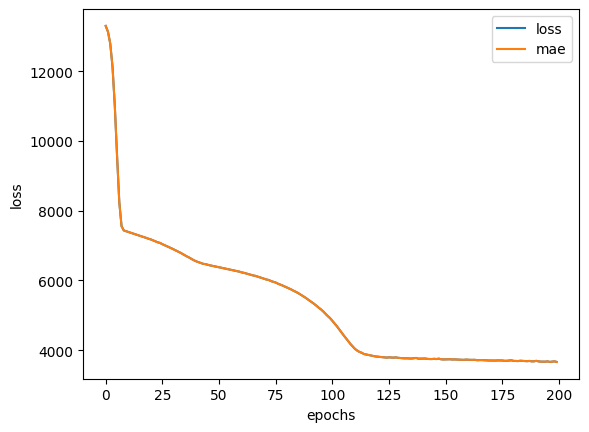

In [ ]:
# Plot history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

**How long should you train for?**

It depends. It depends on the problem you're working on. Tensorflow  has a solution. It's called the [EarlyStoppingCallback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping), which is a TensorFlow component you can add to your model to stop training once it stops improving a certain metric

### Preprocessing data (normalization and standardization)

In terms of scaling values, neural networks tend to prefer normalization.

If you're not sure on which to use, you could try both and see which performs better

In [ ]:
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


<Axes: ylabel='Frequency'>

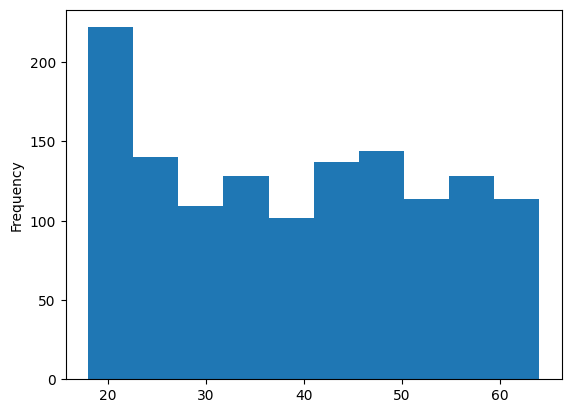

In [ ]:
X["age"].plot(kind="hist")

<Axes: ylabel='Frequency'>

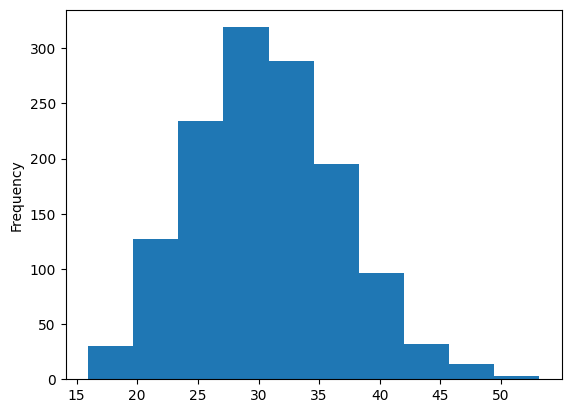

In [ ]:
X["bmi"].plot(kind="hist")

In [ ]:
# Important Required Libraries
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder

# Create a column transformer
ct=make_column_transformer(
    (MinMaxScaler(),["age","bmi","children"]),  # turn all values in these columns between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"),["sex","smoker","region"])
    )

# Create X & y
X=insurance.drop("charges",axis=1)
y=insurance["charges"]

# Build train and test sets
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

# Tranform training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal=ct.transform(X_train)
X_test_normal=ct.transform(X_test)

In [ ]:
# What does our data look like now?
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [ ]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

Our data has been normalized and one hot encoded. Now let's build a neural network model on it and see how it goes

In [ ]:
# Build a neural network model to fit on our normalized data
tf.random.set_seed(42)

# 1. Create the model
insurance_model_4=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_4.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])
# 3. Fit the model
insurance_model_4.fit(X_train_normal,y_train,epochs=100)


Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13344.4414 - mae: 13344.4414
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13336.9717 - mae: 13336.9717
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 13318.2188 - mae: 13318.2188
Epoch 4/100
34/34 [==============================] - 0s 4ms/step - loss: 13277.6592 - mae: 13277.6592
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 13203.7891 - mae: 13203.7891
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 13085.0244 - mae: 13085.0244
Epoch 7/100
34/34 [==============================] - 0s 4ms/step - loss: 12910.6895 - mae: 12910.6895
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 12670.6367 - mae: 12670.6367
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 12354.6729 - mae: 12354.6729
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 11957.86

In [ ]:
insurance_model_4.evaluate(X_test_normal,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3441.3032 - mae: 3441.3032


[3441.30322265625, 3441.30322265625]

In [ ]:
print(tf.__version__)

2.13.0
